## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

<b> Загрузка и предобработка данных <b>

In [11]:
#импортируем бибилиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(palette="Blues")

In [12]:
#загружаем файл
data = pd.read_csv('unemployed.csv', sep= ';')

In [13]:
data.head(5)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0.0,4.0,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1.0,4.0,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1.0,4.0,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0.0,4.0,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1.0,2.0,True,False,False,2


In [14]:
#Общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   district           object 
 2   region             object 
 3   month_application  object 
 4   changed_value      bool   
 5   age                object 
 6   gender             float64
 7   education          float64
 8   hc_repeat          bool   
 9   hc_didnotwork      bool   
 10  find_new_job       bool   
 11  count              int64  
dtypes: bool(4), float64(2), int64(2), object(4)
memory usage: 281.9+ MB


In [15]:
#Явные дубликаты
len(data[data.duplicated()])

0

In [16]:
#Скрытые дубликаты
len(data[data.duplicated(subset='id')])

0

In [17]:
#Ищем колонки с Null-значениями
cols_to_check=[]
for col in data.columns.unique().tolist():
    #print(len(data[data[col].notna()]))
    if len(data[data[col].notna()])<len(data):
        cols_to_check.append(col)

In [18]:
cols_to_check

['gender', 'education']

In [19]:
data[data['education'].isna()].head(2)

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
1579,46072,Дальневосточный федеральный округ,Амурская область,2020-05,False,28-33,1.0,NaN,True,False,True,1
1603,45882,Дальневосточный федеральный округ,Амурская область,2020-05,False,28-33,0.0,NaN,True,False,False,1


<span style="color: teal">Мы не сможем восстановить данные об образовании граждан, поэтому заполним все пропуски Значением "0" - нет данных .Преобразуем тип данных в целочисленный

In [21]:
#Заполнили пропуски
data['education'] = data['education'].fillna(0)

In [22]:
#Преобразовали тип данных
data['education']=data['education'].astype(int)

In [23]:
len(data[data['education'].isna()])

0

<span style="color: teal">Таким образом, пропусков в графе education не осталось

In [25]:
f"""{len(data[data['gender'].isna()])} пропусков в графе Пол  """

'8 пропусков в графе Пол  '

In [26]:
data.dropna(subset='gender', inplace=True)

In [27]:
f""" После очистки {len(data[data['gender'].isna()])} пропусков в графе Пол  """

' После очистки 0 пропусков в графе Пол  '

In [28]:
data=data.reset_index(drop=True)

In [29]:
len(data) #Удалили 8 значений

4347408

In [30]:
data['gender']=data['gender'].astype(int)

<span style="color: teal">Таким образом, пропусков в графе Пол не осталось

<span style="color: teal">Тип данных изменен для оптимального хранения

In [32]:
#Переведем данные в формат времени
data['month_application']=pd.to_datetime(data['month_application'],format='%Y-%m')

In [33]:
#Добавим столбцы с месяцем и годом заявки
data['month']= data['month_application'].dt.month

In [34]:
data['year'] = data['month_application'].dt.year

<span style="color: teal"><b> Выводы: <b>

<span style="color: teal">Таблица unemployment содержит данные по безработным граждан, включая демографические, социальные данные и графы, непоредственно относящиеся к поиску работы.

<span style="color: teal">0. Датасет содержин 12 колонок , количество строк после преобразования  - 4347408

<span style="color: teal">1.В данных присутсвуют отсутсвующие значения в колонках : Образование, Пол(гендер). Null - значения были заполнены или удалены, если содержались в небольшом количестве относительно объема датасета

<span style="color: teal">2. Тип данных в колонках education,gender был преобразован в int для более оптимального хранения

<span style="color: teal">3. Тип данных в графе month_application Содержит информацию о дате подачи заявки, но хранился в строковом типе данных. Колонка была преобразована в datetime тип для возможности осуществления манипуляций с датами




In [ ]:
#Сводная таблица для определния числа обращений
job_applications=data.pivot_table(index='month_application',
                 aggfunc='count',
                 values='id').reset_index()


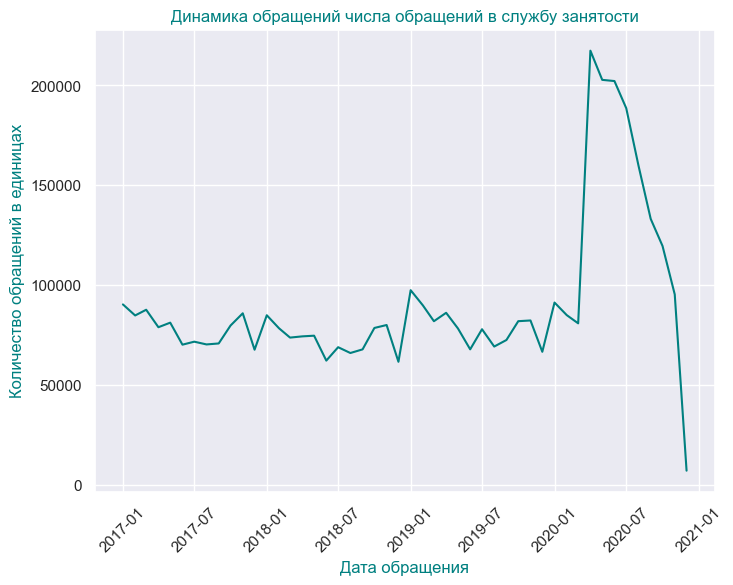

In [38]:
plt.figure(figsize=(8,6))
plt.plot(job_applications['month_application'],job_applications['id'], color= 'teal' )
plt.xticks(rotation=45)
plt.xlabel('Дата обращения', color = 'teal')
plt.ylabel('Количество обращений в единицах' , color= 'teal')
plt.title('Динамика обращений числа обращений в службу занятости', color= 'teal')
plt.show()

<span style="color: teal">Исходя из графика, мы видим небольшие сезонные колебания по количеству заявок на поиск работы, а также резкий всплеск обращений в начале 2020 года. 

<span style="color: teal">Таая динамика обусловлена глобальными внешними факторами   в марте - июне 2020 , когда многие люди потеряли работу в связи с сокращением рабочих мест на фоне пандемии covid-19

In [81]:
#Сводная таблица для подсчета обращений по годам
yearly_applications= data.pivot_table(index='year',
                aggfunc='count',
                values='id').reset_index()


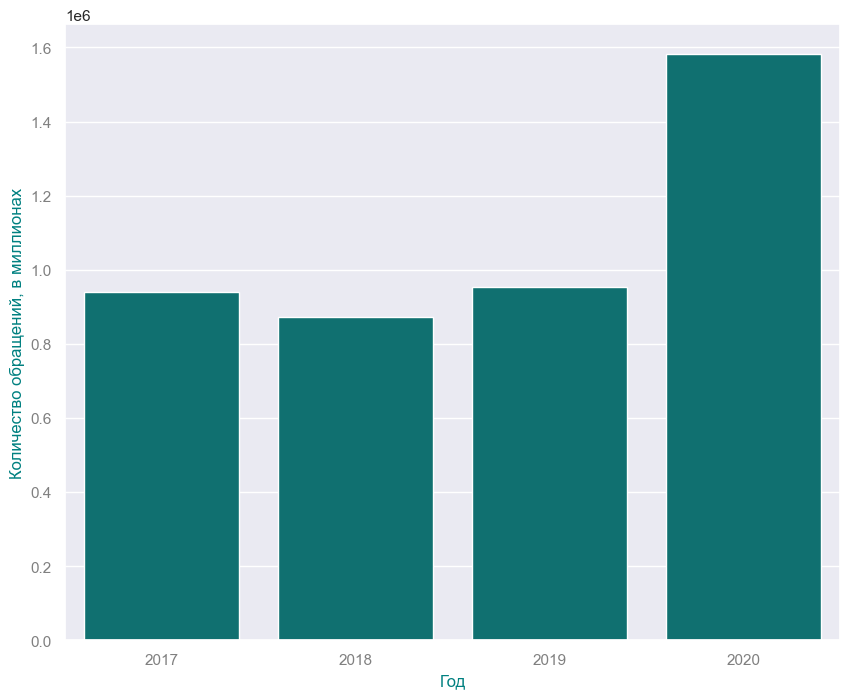

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(x='year', y= 'id', data= yearly_applications, color='teal')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.ylabel("Количество обращений, в миллионах", color = 'teal')
plt.xlabel("Год", color= 'teal')
plt.show()

<span style="color: teal">Из графика видно, что в 2017-2019 наблюдалось приблизительное одинаковое количество заявок от граждан, находящизся в посике работы.

<span style="color: teal">В 2020 году наблюдается рост обращений до 1,5 млн. штук, что свидетельствует о повышении уровня безработицы в связи с пандемией 2020 года

In [43]:
#Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.
application_repeated=data[data['count']>1].groupby('month_application').count()['id'].reset_index()
application_repeated_another=data[data['hc_repeat']==True].groupby('month_application').count()['id'].reset_index()

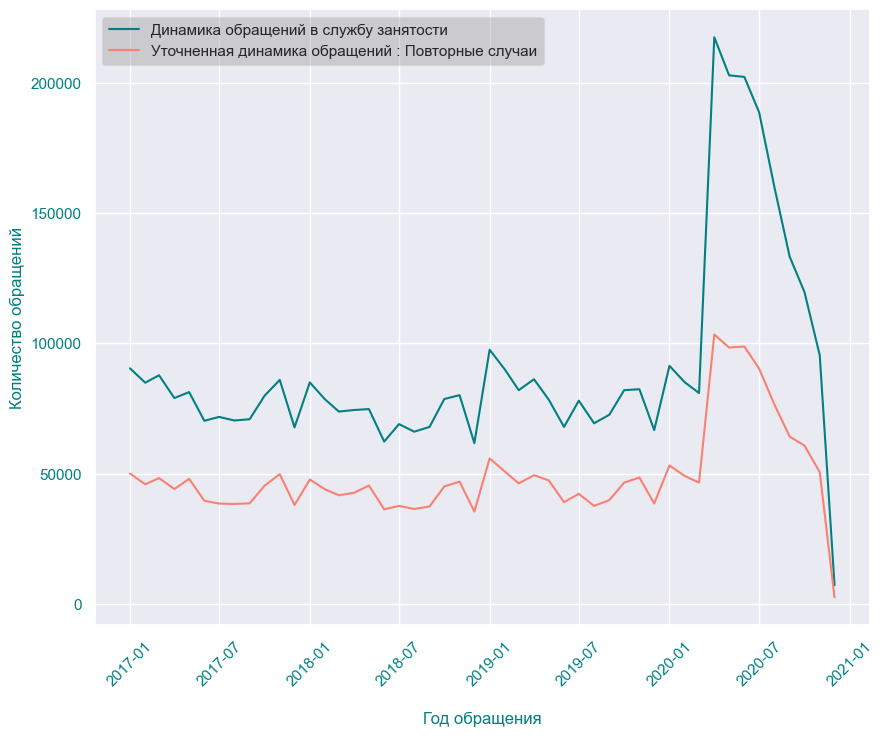

In [44]:
plt.figure(figsize=(10,8))
plt.plot(job_applications['month_application'],job_applications['id'], color= 'teal' , label='Динамика обращений в службу занятости')
plt.plot(application_repeated_another['month_application'], application_repeated_another['id'], color ='salmon', label ='Уточненная динамика обращений : Повторные случаи')

plt.xticks(rotation= 45, color='teal')
plt.yticks(color='teal')
plt.xlabel('\nГод обращения', color='teal')
plt.ylabel('Количество обращений', color='teal')
plt.legend(facecolor='grey', framealpha=0.3)
plt.show()

<span style="color: teal"><b> ВЫВОДЫ <b>

<span style="color: teal">Исходя из динамики трудоустройства по годам, можем заметить, что самый "острый" период по количеству обращений в службу занятости пришелся на 2020 год.
В период весны-лета 2020 также наблюдается пиковое значение повторных обращений в службу занятости.
В 2017-2019 году количество обращений было примерно одинаково, на скачки и падения влияли сезонные тренды

In [90]:
#Сводная таблица для определения числа обращений по возрастному признаку
age_groups=data[['age','year']].value_counts().reset_index().sort_values(by='age')
age_groups_det=age_groups.iloc[:, [0,2]]


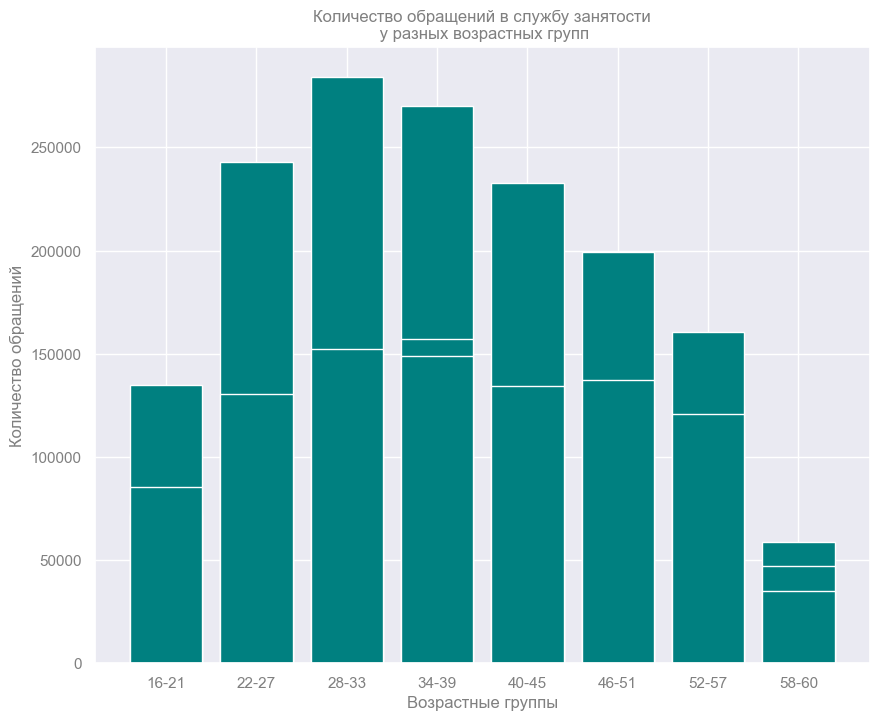

In [48]:
plt.figure(figsize=(10,8))
plt.bar(x = 'age', height = 'count', data=age_groups_det,color='teal')
plt.xticks(color='grey')   
plt.yticks(color='grey')
plt.title('Количество обращений в службу занятости\n у разных возрастных групп', color='gray')
plt.ylabel('Количество обращений', color='gray')
plt.xlabel('Возрастные группы', color='gray')
plt.show()


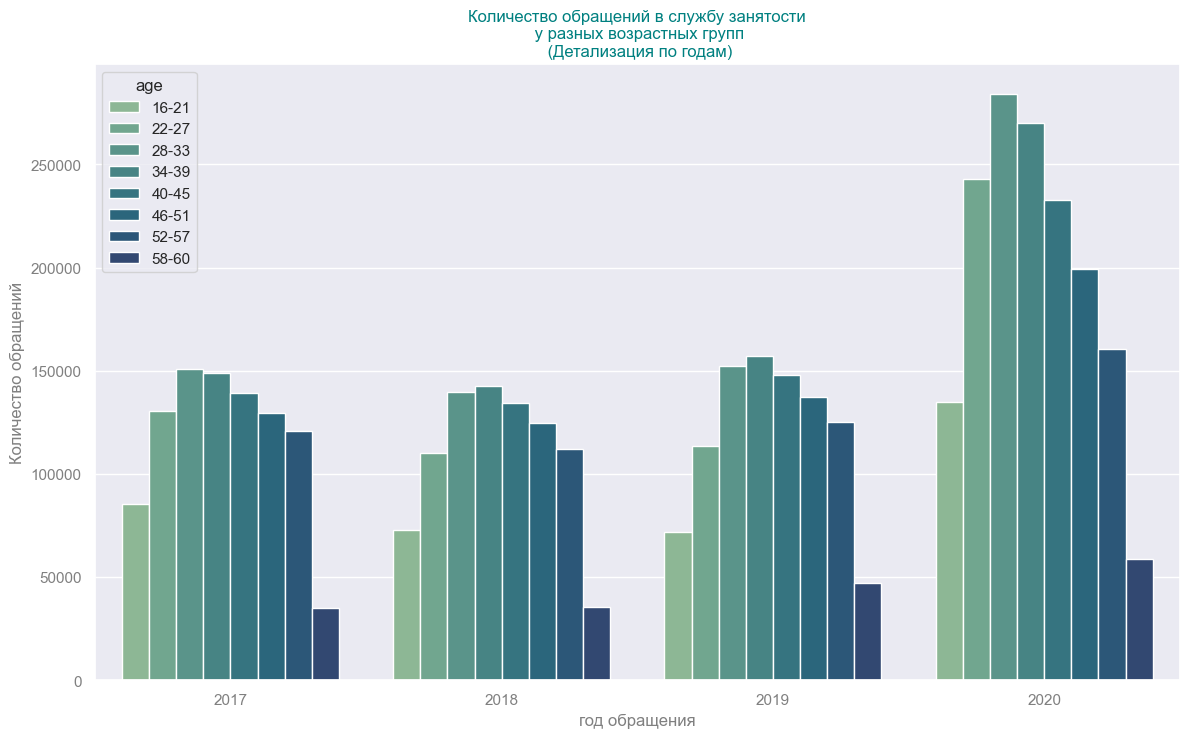

In [150]:
plt.figure(figsize=(14,8))
sns.barplot(x ='year', y = 'count', hue='age', data=age_groups, palette='crest')
plt.xticks(color='grey')   
plt.yticks(color='grey')
plt.title('Количество обращений в службу занятости\n у разных возрастных групп\n (Детализация по годам)', color='teal')
plt.ylabel('Количество обращений', color='gray')
plt.xlabel('год обращения', color='gray')
plt.show()



<span style="background-color:#e9ecef;">
<span style="color: teal">ВЫВОДЫ 


<span style="color: teal">Мы видим, что в абсолютных показателях, возрастная группа 28-33 чаще всего обращается на биржу труда. В этом возрасте, как правило, граждане уже обретают компетенции на первой работе, и хотят расти по карьерной лестнице, поэтому ищут работу, отвечающую их запросам и ценностям.

<span style="color: teal"> 
Также, среди лидеров выступает группа 34-39 лет, что может быть обусловлено "Эйджизмом" - сложностью в быстром поиске работы по возрастному признаку

<span style="color: teal"> 
Ежегодно в службу занятости меньше всего обращаются граждане в возрасте 58-60 лет в виду приближающегося пенсионного возраста. Также, для людей этого поколения более свойственно не менять место работы в течение жизни, оставаться на 1 и том же рабочем месте

<span style="color: teal"> 
По данным Росстата, в 2024 году средний возраст работников в России достиг 42,5 года,  каждый график сгруппирован относительно этого среднего показателя (эмпирически видно), значит возраст обратившихся граждан распределен нормально


Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.

In [52]:
f""" {len(data[data['find_new_job']==True])} граждан устроилось на работу за все время наблюдений"""

' 1858190 граждан устроилось на работу за все время наблюдений'

In [53]:
f""" {format(len(data[data['find_new_job']==True])/len(data), ".00%")} граждан устроились на работу за все время наблюдений"""

' 43% граждан устроились на работу за все время наблюдений'

Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.
Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.
Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.
Осуществите категоризацию по столбцам gender и education в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.
Исследуйте безработицу в России отдельно за 2000 год (за исключением декабря 2020!). Создайте срез данных.

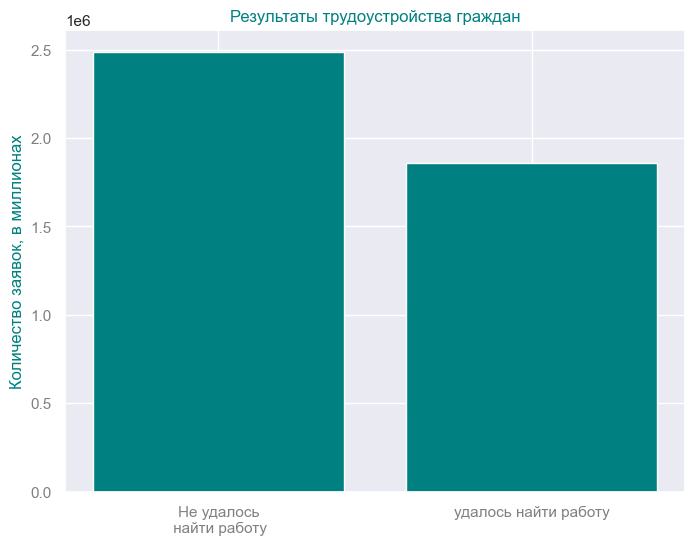

In [55]:

got_jobs=data['find_new_job'].value_counts().reset_index()
plt.figure(figsize= (8,6))
plt.bar(x='find_new_job', height= 'count',  data=got_jobs, color= 'teal')
plt.xticks(np.arange(2), ['Не удалось\n найти работу', 'удалось найти работу'], color = 'grey')
plt.ylabel('Количество заявок, в миллионах', color='teal')
plt.yticks(color='grey')
plt.title('Результаты трудоустройства граждан', color='teal')
plt.show()

In [56]:
#соотношение трудоустройства по каждому году (в абсолютных значениях)
get_the_job=data.pivot_table(index=['year','find_new_job'],
                 #columns='find_new_job',
                 aggfunc='count',
                 values='id').reset_index()
get_the_job['find_new_job']=get_the_job['find_new_job'].astype(str)
get_the_job.loc[get_the_job['find_new_job']=='False','find_new_job']='Не нашли работу'
get_the_job.loc[get_the_job['find_new_job']=='True','find_new_job']='Нашли работу'

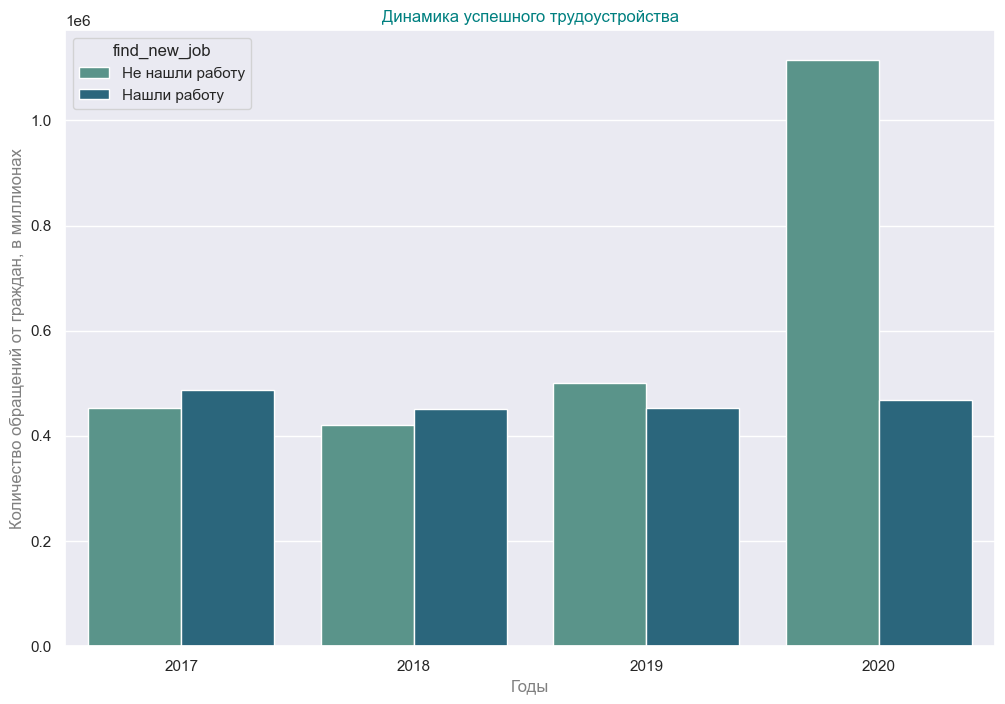

In [146]:
plt.figure(figsize=(12,8))
sns.barplot(data=get_the_job, x="year", y='id', hue='find_new_job', palette='crest')
plt.xlabel('Годы', color='grey')
plt.ylabel('Количество обращений от граждан, в миллионах', color='grey')
plt.title('Динамика успешного трудоустройства', color='teal')
plt.show()

#sns.barplot(data=jobs_by_years, x="year", y=True, ax=ax)

<span style="color: teal">Осуществите категоризацию по столбцам gender и education в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования. </span>

In [59]:
education_didntwork=data[data['hc_didnotwork']==True]['education'].value_counts().reset_index()

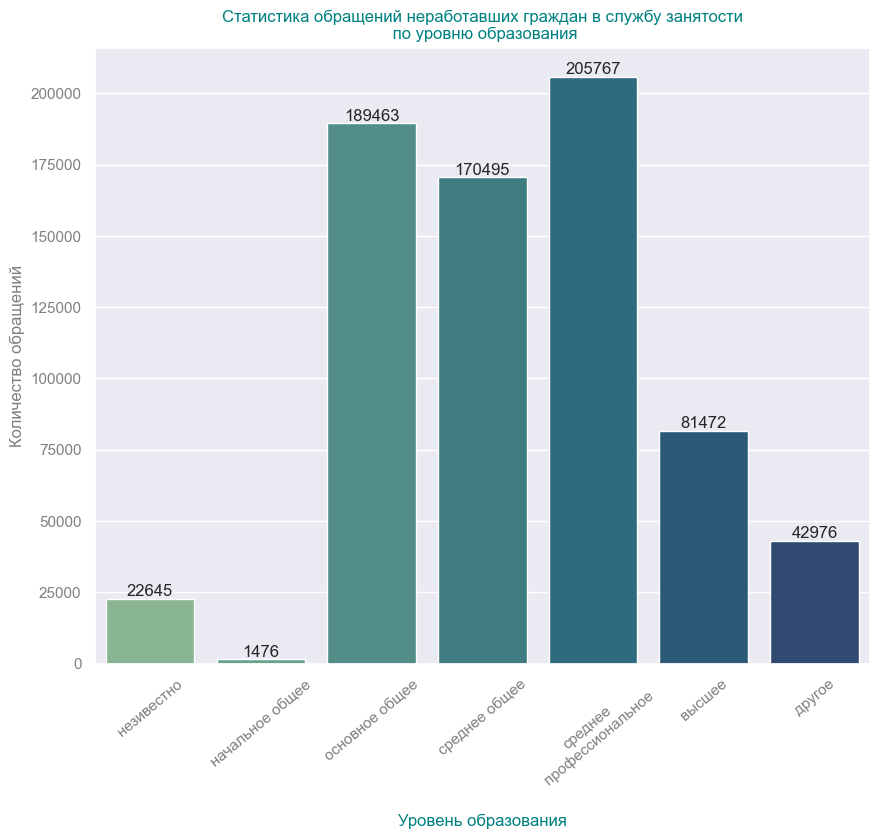

In [144]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=education_didntwork, x='education', y ='count',  palette='crest')
plt.title('Статистика обращений неработавших граждан в службу занятости\n по уровню образования', color='teal')
plt.xticks(np.arange(7) , ['незивестно', 'начальное общее', 'основное общее', 'среднее общее', 'среднее\n профессиональное', 'высшее', 'другое' ], rotation =40, color='grey')
plt.xlabel('\nУровень образования', color='teal')
plt.ylabel('Количество обращений', color='grey')
plt.yticks(color='grey')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [61]:
# Определите соотношение трудоустройства по каждому уровню образования.
educations_jobs=data.pivot_table(index=['education','find_new_job'],
                 aggfunc='count', 
                 values='id').reset_index()
educations_jobs['find_new_job']=educations_jobs['find_new_job'].astype(str)

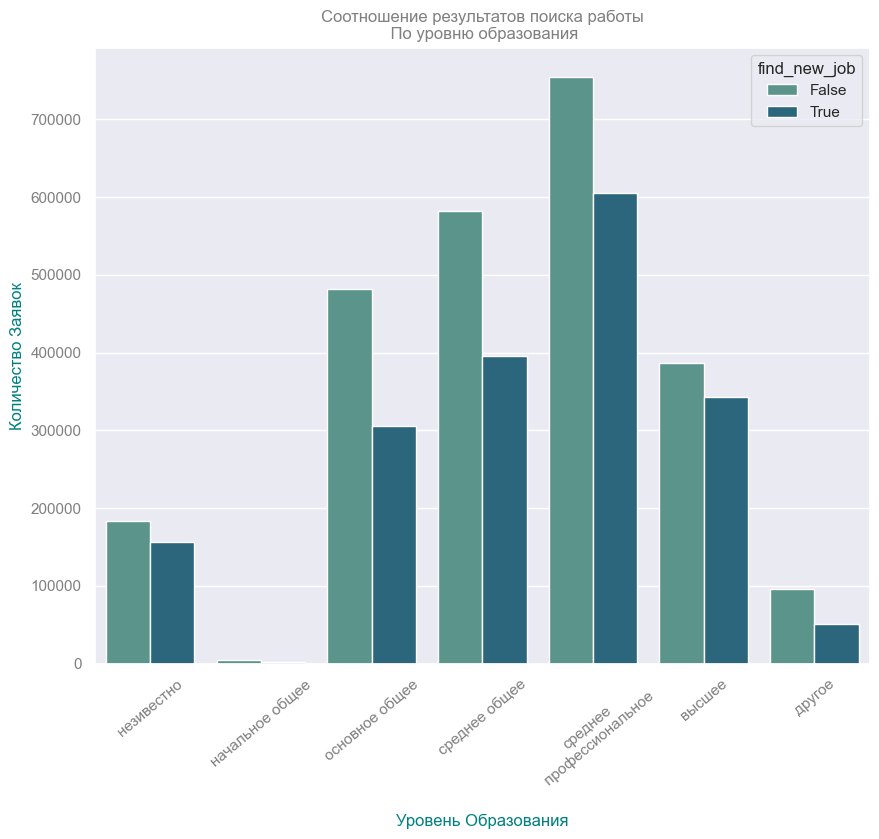

In [140]:
plt.figure(figsize=(10,8))
sns.barplot(data=educations_jobs, x='education', y ='id', hue='find_new_job', palette='crest')
plt.ylabel('Количество Заявок', color='teal')
plt.xticks(np.arange(7) , ['незивестно', 'начальное общее', 'основное общее', 'среднее общее', 'среднее\n профессиональное', 'высшее', 'другое' ], rotation =40, color='grey')
plt.xlabel('\nУровень Образования', color= 'teal')
plt.title('Соотношение результатов поиска работы\n По уровню образования', color= 'grey')
plt.yticks(color='grey')
plt.show()

<span style="color: teal"><b> Выводы <b>

<span style="color: teal">  1858190 граждан устроилось на работу за эти годы, значит, 43% граждан устроились на работу за все время наблюдений.
Количество граждан, нашедших работу превалировало над теми, кому не удалось найти место только в 2017 и 2018 году, что свидетельствует о возможном сокращении вакансий, усложненном процессе найма и структурных изменениях на рынке труда.
Наибольшее количество обращений о поиске работы было получено со стороны граждан со средним профессиональным образованием, а наименьший разброс в успехе нахождения позиции наблюдается со стороны кандидатов с высшим образованием

In [65]:
data_2020=data[(data['year']==2020)&(data['month'] !=12)]

In [66]:
data_2020_bar=data_2020.pivot_table(index=['month','find_new_job'],
                     aggfunc='count',
                     values='id').reset_index()
data_2020_bar['find_new_job']=data_2020_bar['find_new_job'].astype('str')
data_2020_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         22 non-null     int32 
 1   find_new_job  22 non-null     object
 2   id            22 non-null     int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 572.0+ bytes


In [67]:
data_2020_bar.loc[data_2020_bar['find_new_job']=='False','find_new_job']='Не нашли работу'
data_2020_bar.loc[data_2020_bar['find_new_job']=='True','find_new_job']='Нашли работу'

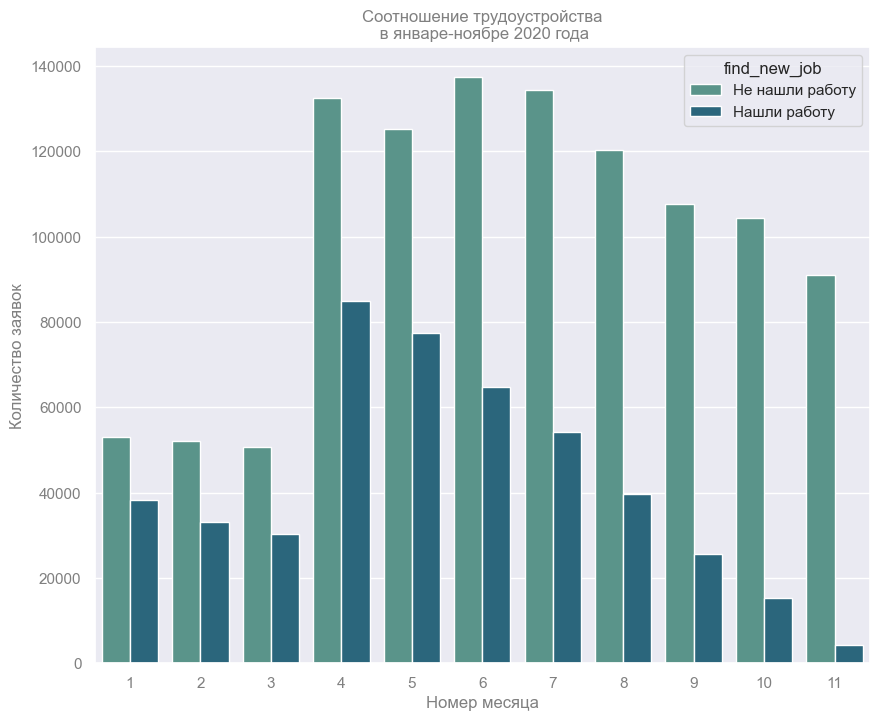

In [116]:
plt.figure(figsize=(10,8))
sns.barplot(data=data_2020_bar, x='month', y='id', hue='find_new_job', palette='crest')
plt.title('Соотношение трудоустройства\n в январе-ноябре 2020 года', color='gray')
plt.xlabel('Номер месяца', color='grey')
plt.ylabel('Количество заявок', color='grey')
plt.yticks(color='grey')
plt.xticks(color='grey')
plt.show()

<span style="color: teal"><b>  ВЫВОДЫ<b>

<span style="color: teal">Самый большой разрыв в безработице 2020 года наблюдается в период апреля-октрября, так как последствия пандемии covid-19 наблюдались вплоть до 2021 года. Массовые сокращения в компаниях, локдаун, снижение оборототв и серьезные ограничения на бизнесы повлияли на работотдателей и работников, вынудив вторых выйти на биржу труда. Как видно из графика, с июня 2020 года количество граждан, не нашедших работу превышает почти в 2 раза тех, кому удалосб устроиться

<span style="color: teal"> Определите процент трудоустройства по гендерной принадлежности
6.3 Определите число обращений в службу занятости по федеральным округам.
6.4 Определите разброс числа объявлений по регионам с помощью boxplot.
6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.
6.6 Определите процент трудоустройства по федеральным округам.
6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле </span>

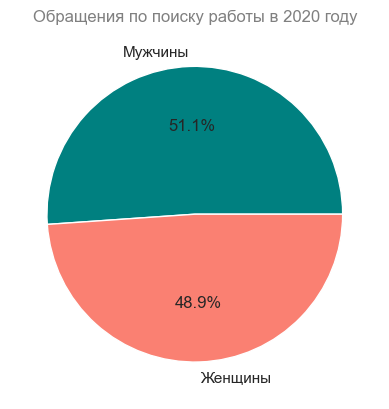

In [71]:
plt.pie(data_2020['gender'].value_counts(), labels=['Мужчины','Женщины'], colors=['teal','salmon'],autopct='%1.1f%%' )
plt.xticks(color='grey')
plt.title('Обращения по поиску работы в 2020 году', color='grey')
plt.show()

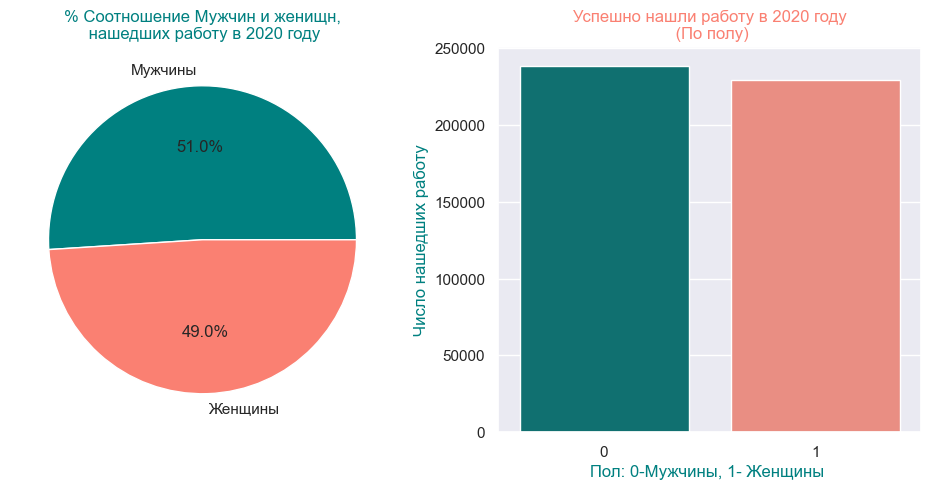

In [72]:

gender_2020=data_2020.pivot_table(index=[data_2020[data_2020['find_new_job']==True]['find_new_job'], 'gender'],
                      aggfunc='count',
                      values='id').reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.pie(data_2020[data_2020['find_new_job']==True]['gender'].value_counts(), labels=['Мужчины','Женщины'], colors=['teal','salmon'],autopct='%1.1f%%')
sns.barplot(data=gender_2020, x= 'gender', y='id',ax=ax2, palette=['teal','salmon'])
ax1.set_title('% Соотношение Мужчин и женищн,\n нашедших работу в 2020 году', color='teal')
ax2.set_title('Успешно нашли работу в 2020 году\n (По полу)', color='salmon')
ax2.set_xlabel('Пол: 0-Мужчины, 1- Женщины ', color='teal')
ax2.set_ylabel('Число нашедших работу', color='teal')
plt.show()

<span style="color: teal">Число обращений в службу занятости по федеральным округам

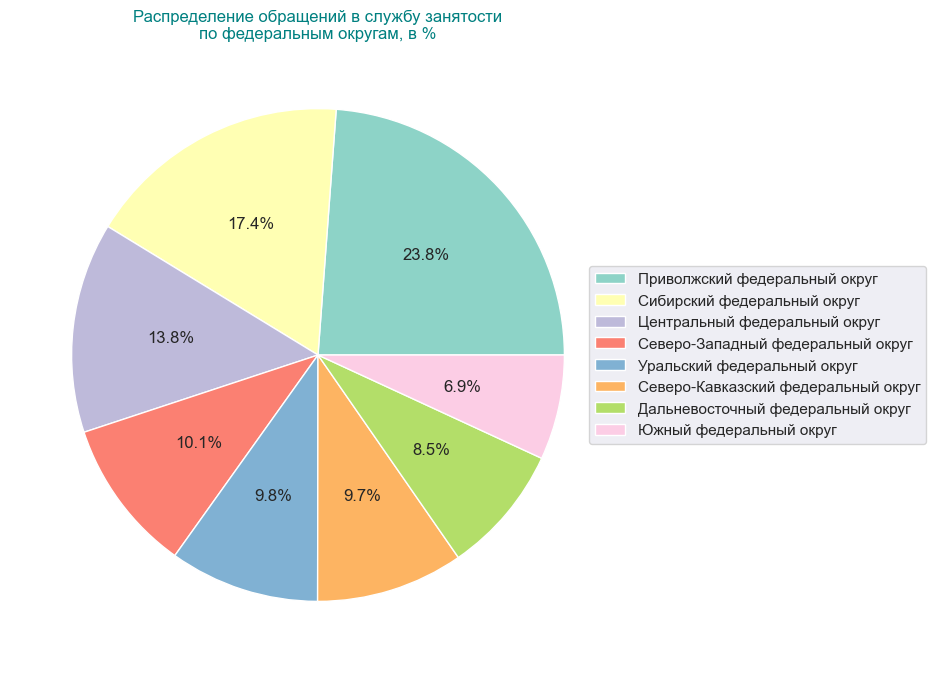

In [199]:
plt.figure(figsize=(10,8))
colors = sns.color_palette("Set3")
plt.pie(data_2020['district'].value_counts(), autopct='%1.1f%%', colors=colors)
plt.legend(labels=data_2020['district'].value_counts().reset_index()['district'].tolist(), 
           loc='center right',
           bbox_to_anchor=(1, 0, 0.5, 1)) #Легенда сбоку справа 
plt.title('Распределение обращений в службу занятости\nпо федеральным округам, в %', color='teal')
plt.show()

<span style="color: teal"> <b> ВЫВОДЫ <b> 

<span style="color: teal"> 
Исходя из результатов круговой диаграммы, мы видим, что на биржу труда поступает практически одинаковое число сообщения от мужчин и женщин с небольшим перевесом в сторону мужчин. Что означает, что в России желание и стремление работать возникает одинаково у обоих полов.
Также, практически идентичные резульаты у счастливичков, нашедших работу : 51% из них мужчины, а 49% - женщины

<span style="color: teal"> 
Лидирующим регионом по числу обращений является Приволжский федеральный округ с показателем в 23.8% от общего числа обращений, а в Южном федеральном округе напротив - наименьший спрос на поиск новой работы. Всего 6.9% от общего числа заявок

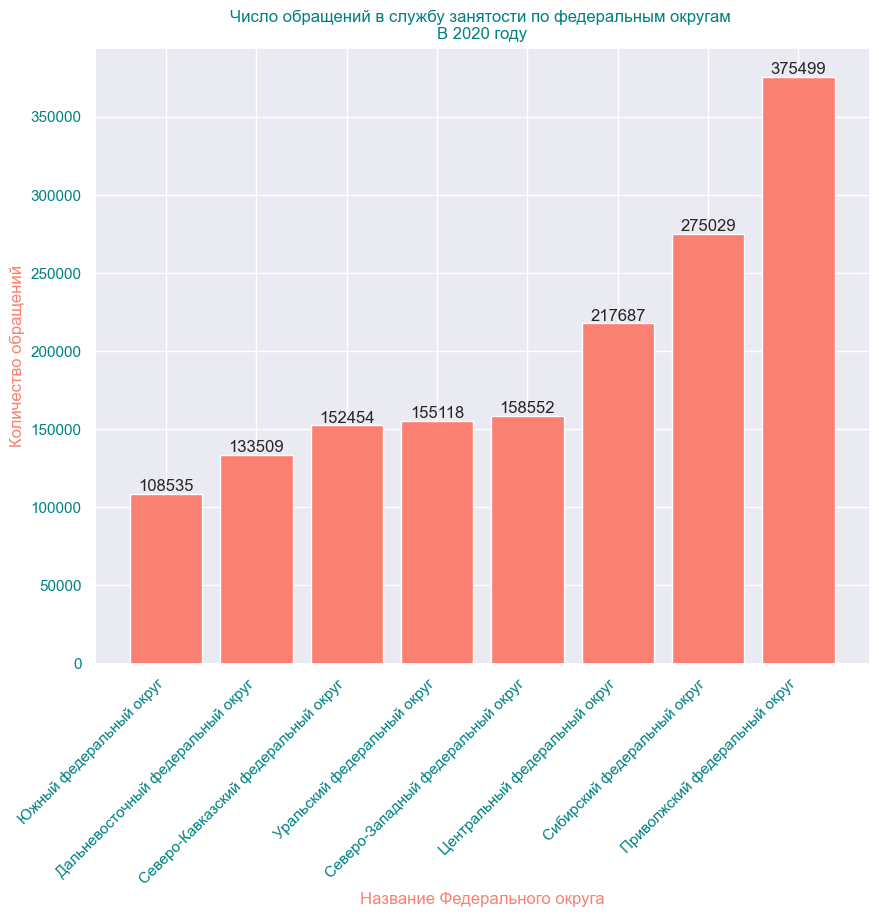

In [230]:
fig,ax=plt.subplots(figsize=(10,8))
plt.bar(data=data_2020['district'].value_counts().reset_index().sort_values('count'),x='district', height='count', color='salmon')
plt.xticks(rotation=45,color='teal',ha='right')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Число обращений в службу занятости по федеральным округам \nВ 2020 году', color='teal')
plt.ylabel('Количество обращений', color='salmon')
plt.xlabel('Название Федерального округа', color='salmon')
plt.yticks(color='teal')
plt.show()


<span style="color: teal">Определите разброс числа объявлений по регионам с помощью boxplot.

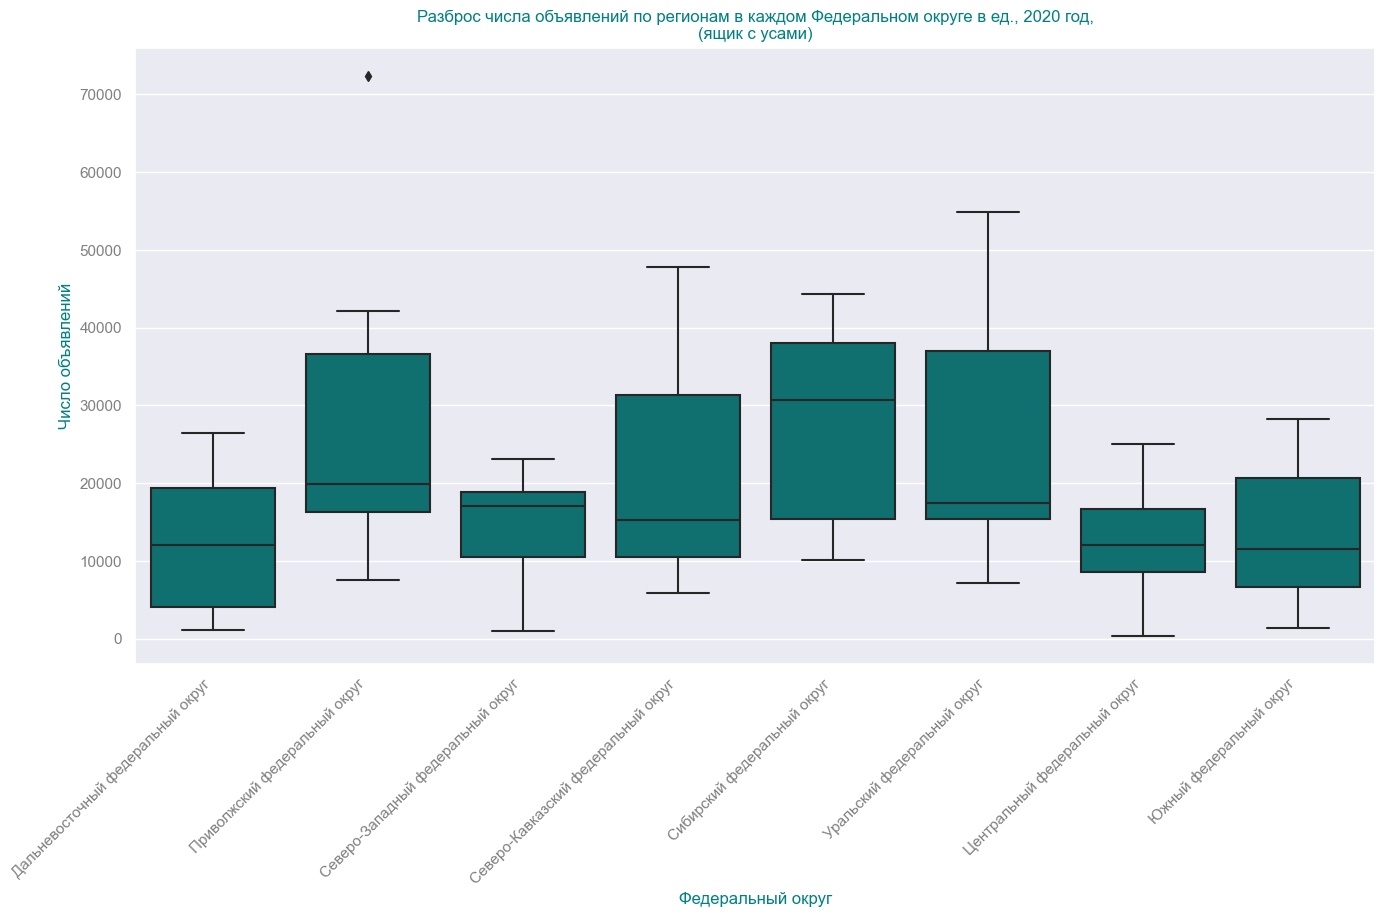

In [253]:
plt.figure(figsize=(16,8))
d_r=data_2020.groupby(['district','region'])['id'].count().reset_index()
sns.boxplot(data=d_r,x='district',y='id' ,color='teal')
plt.xticks(rotation=45,ha='right',color='grey')
plt.yticks(color='grey')
plt.title('Разброс числа объявлений по регионам в каждом Федеральном округе в ед., 2020 год,\n(ящик с усами)', color='teal')
plt.xlabel('Федеральный округ',color='teal')
plt.ylabel('Число объявлений',color='teal')
plt.show()

<span style="color: teal"> Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.

<span style="color: teal"> <b> ВЫВОДЫ: <b>

<span style="color: teal"> 
Медианное количество обращений, приходящихся на регионы каждого федерального округа колеблется в интервале от 10000 до 30000. Выброс наблюдается в Приволжском федеральном округе, а в большинстве федеральных округов распределние заявок в регионах не является симметричным. Ярче всего это проявляется в Северо-Кавказском ф.о, а также Уральском ф.о - правосторонняя ассиметрия, большая часть данных сгруппирована ближе к нижней границе, с выбросами "сверху" 

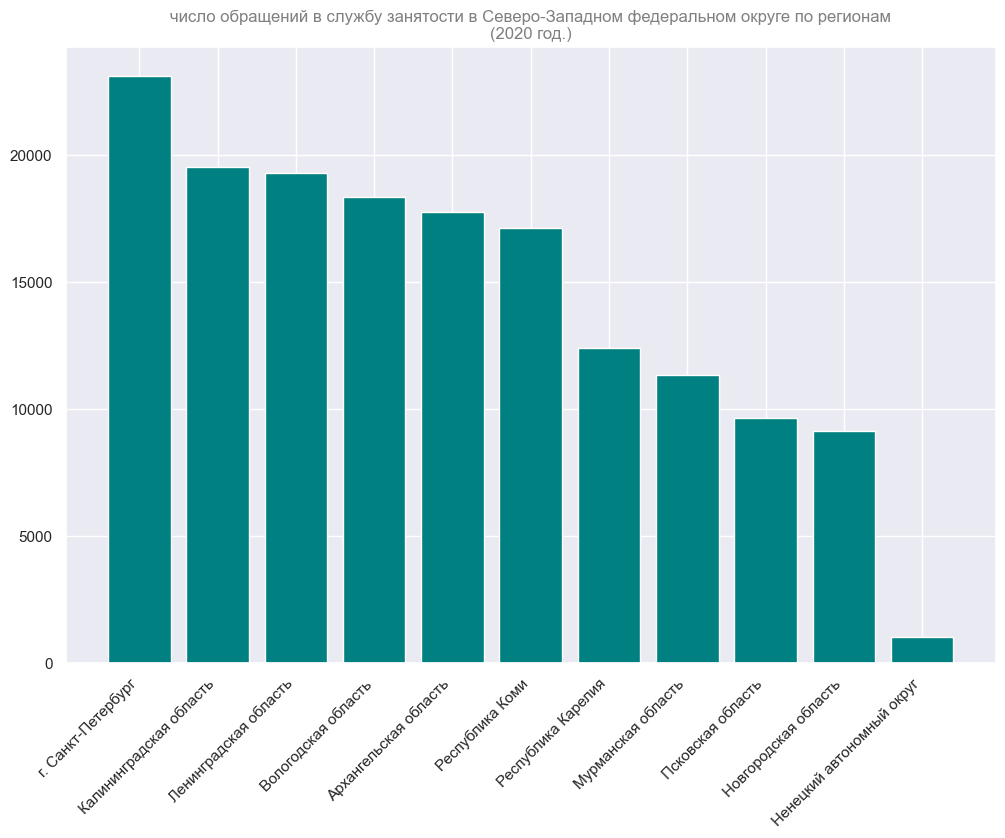

In [128]:
plt.figure(figsize=(12,8))
plt.bar(data=data_2020[data_2020['district']=='Северо-Западный федеральный округ']['region'].value_counts().reset_index(), 
        x='region' ,
        height='count',
       color='teal')
plt.xticks(rotation=45,ha='right')
plt.title('число обращений в службу занятости в Северо-Западном федеральном округе по регионам\n(2020 год.)', color='grey')
plt.show()

<span style="color: teal"> Определите процент трудоустройства по федеральным округам.

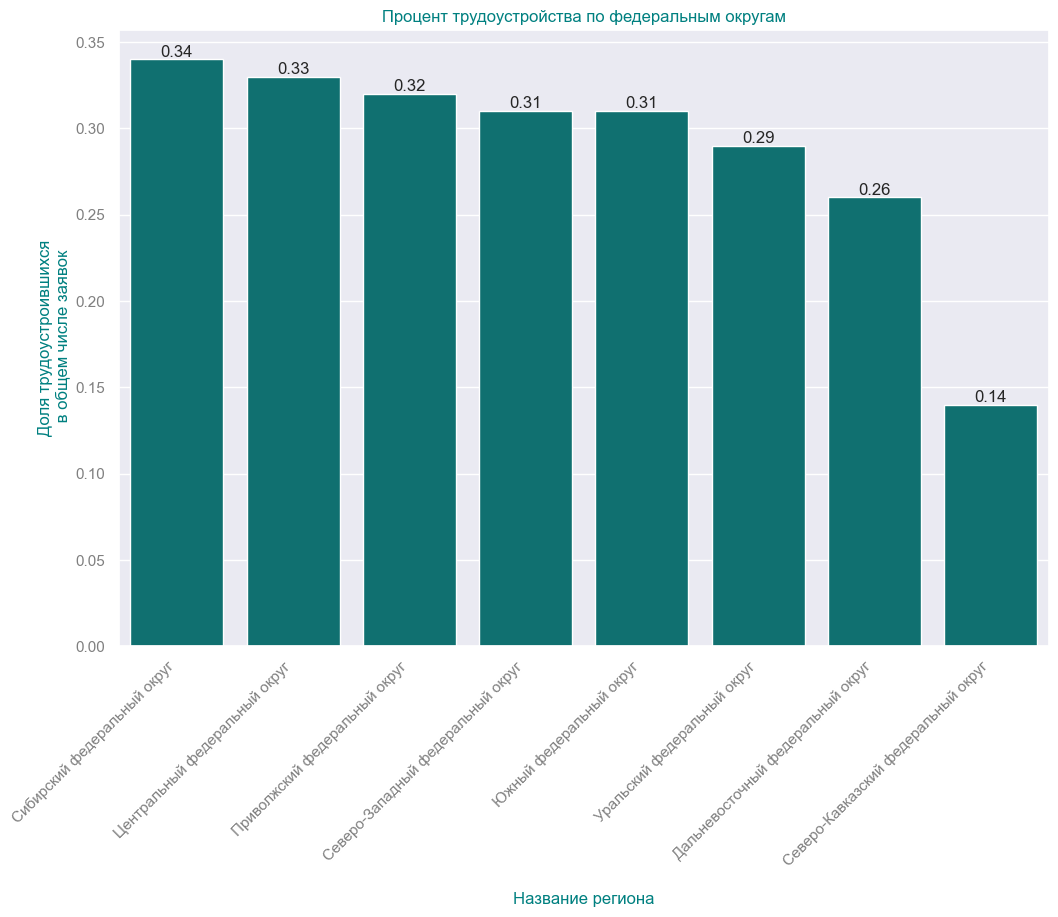

In [131]:
dist_got_jobs=data_2020.pivot_table(index='district',
                 aggfunc= lambda x: round((x==True).sum()/len(x),2),
                 values='find_new_job').reset_index().sort_values(by='find_new_job',ascending=False)
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(data=dist_got_jobs, x='district', y='find_new_job', color='teal')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45,ha='right', color='grey')
plt.ylabel('Доля трудоустроившихся\n в общем числе заявок', color='teal')
plt.xlabel('\nНазвание региона', color='teal')
plt.yticks(color='grey')
plt.title('Процент трудоустройства по федеральным округам',color='teal')
plt.show()

<span style="color: teal"> Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле

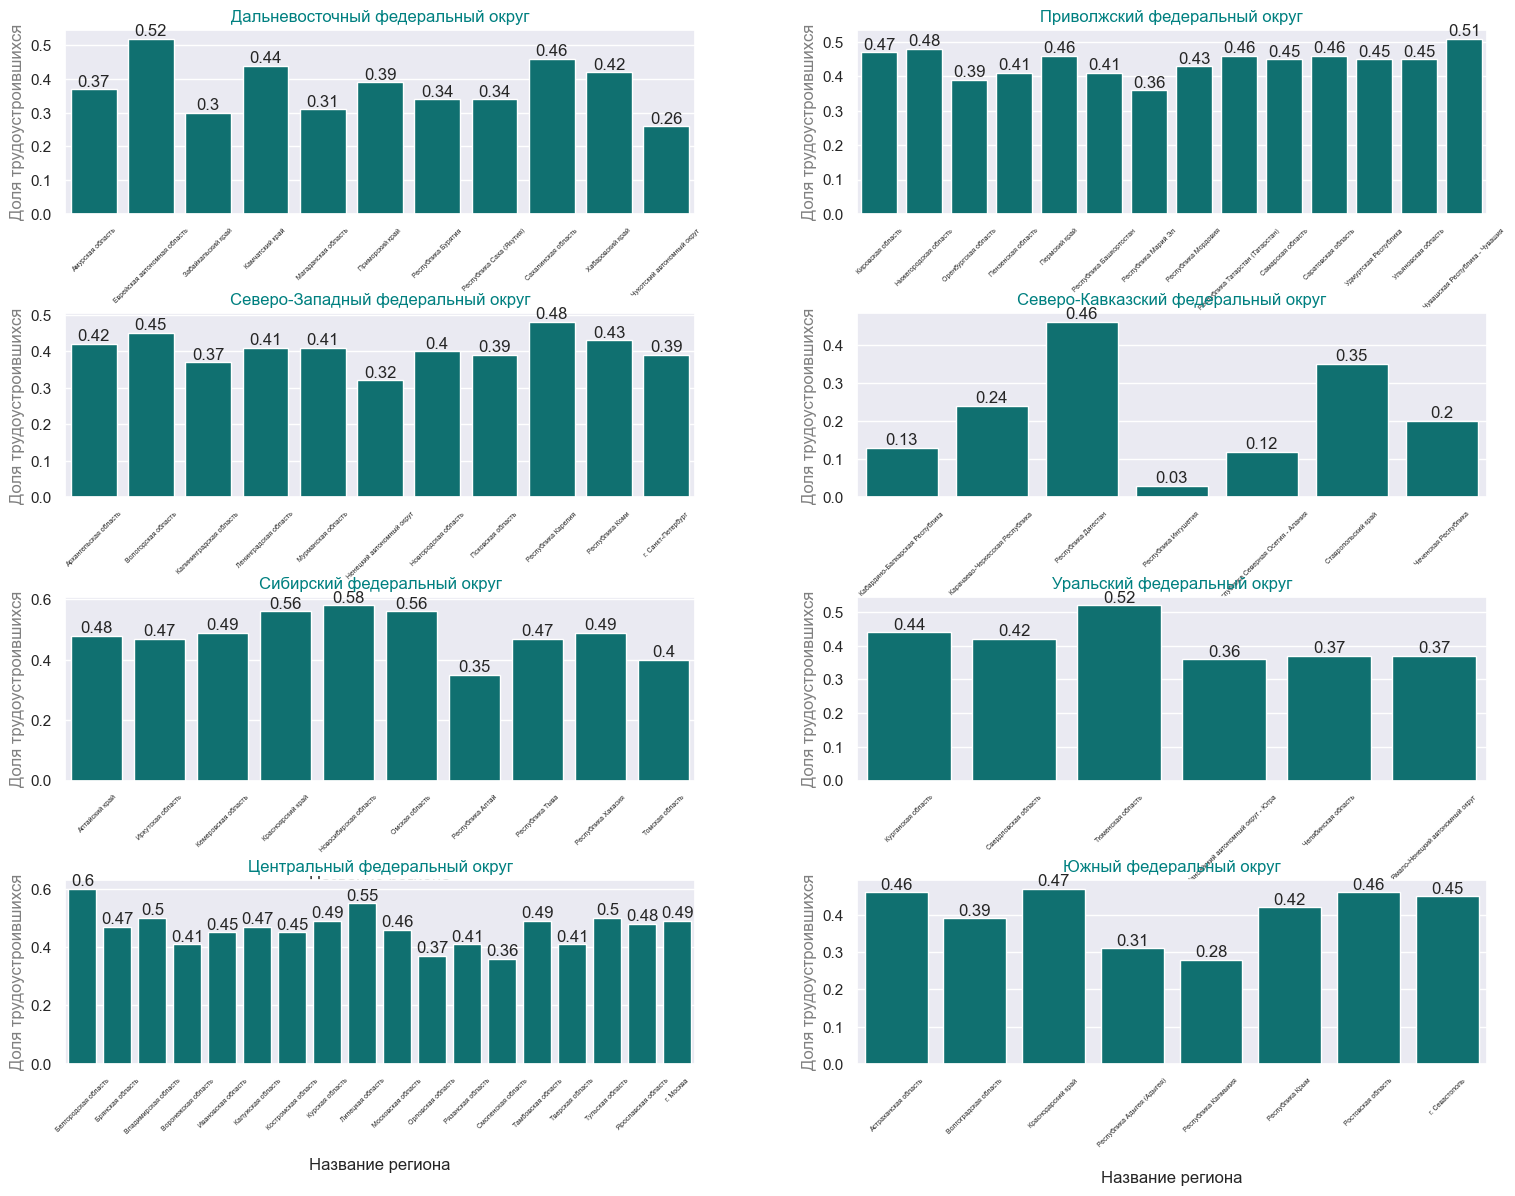

In [279]:
#Реализуем цикл
districts=data_2020['district'].unique().tolist()
districts_len=len(data_2020['district'].unique().tolist())
fig, axs = plt.subplots(int(districts_len/2),2, figsize=(16,12))
list_axs=axs.flatten() #чтобы обращаться к ним в цикле
plt.tight_layout(pad=4,w_pad=7.0)
for cnt, district in enumerate(districts):
     report=data[data['district']==district].pivot_table(index='region',
           aggfunc= lambda x: round((x==True).sum()/len(x),2),
                  values='find_new_job').reset_index()
     sns.barplot(data=report, x='region', y='find_new_job',ax=list_axs[cnt], color='teal').set_title(f"{district}",color='teal')
     list_axs[cnt].tick_params(axis='x', rotation=45, labelsize=5,color='grey') 
     list_axs[cnt].set_xlabel('\nНазвание региона')
     list_axs[cnt].set_ylabel('Доля трудоустроившихся', color='grey')
     for container in list_axs[cnt].containers: #подпишу все значения на столбчатой диаграмме для наглядности
        list_axs[cnt].bar_label(container)
plt.show()    

<span style="color: teal"><b> ВЫВОДЫ <b>
 
<span style="color: teal"> 1. Проведя анализ трудоустройства по регионам и федеральным округам, можно увидеть, что легче всего найти  работу в Сбири - а в частности, в Новосбириске, Красноярске и Омске - в среднем, 57% заявителей нашли свои позиции через биржу.

<span style="color: teal"> 2. Напротив, наименьшая вероятность успеха в Кавказском ф.о - всего 14% заявок обрели работу. Самый перспективный регион округа - республика Дагестан, с наибольшим числом жителей, развитым городом и большим количеством фирм. В Р.Ингушетия , в свою очередь, найти работу крайне сложно - всего 3% заявок окончились найденой позицией.

<span style="color: teal"> 
3. Самое ровное распределение по результатам трудоустройства - В С.З округе, а также - Приволжском округе. в среднем, от 32% до 51% заявок на работу одобрены

<span style="color: teal"> 4. Самым успешным регионом в плане поиска работы является Белгородская область - у 60% граждан получилось найти работу.